# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [2]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------

"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_exc import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Read MNIST data:


Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


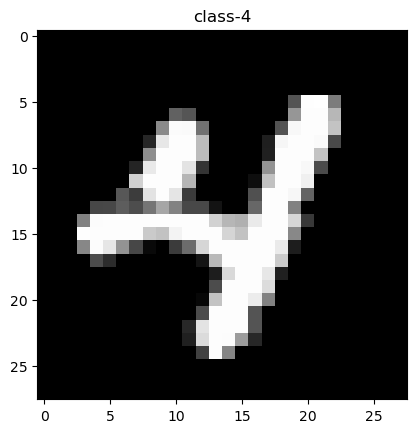

In [5]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = ''

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# CROSS-CHECK: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [7]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [9]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1409.292616: 100%|█████████████████████████████████████| 300/300 [00:04<00:00, 74.03it/s]


epoch: 1 / (30), loss: 1723.427209, train acc: 75.92, val acc: 75.78
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 887.233284: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 77.80it/s]


epoch: 2 / (30), loss: 1146.666780, train acc: 84.21, val acc: 84.05
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 679.207040: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 76.35it/s]


epoch: 3 / (30), loss: 808.896518, train acc: 87.34, val acc: 87.43
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 522.708009: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 69.55it/s]


epoch: 4 / (30), loss: 629.184453, train acc: 88.95, val acc: 88.78
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 485.040387: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 69.59it/s]


epoch: 5 / (30), loss: 525.195207, train acc: 89.79, val acc: 89.73
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 377.278685: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 72.79it/s]


epoch: 6 / (30), loss: 463.381952, train acc: 90.29, val acc: 90.42
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 397.183561: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 68.86it/s]


epoch: 7 / (30), loss: 420.018117, train acc: 90.78, val acc: 90.73
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 426.045183: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 72.49it/s]


epoch: 8 / (30), loss: 387.609422, train acc: 91.35, val acc: 91.17
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 307.762774: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 68.86it/s]


epoch: 9 / (30), loss: 363.618971, train acc: 91.67, val acc: 91.88
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 296.180707: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 70.93it/s]


epoch: 10 / (30), loss: 343.363344, train acc: 91.81, val acc: 91.97
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 316.473367: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 71.65it/s]


epoch: 11 / (30), loss: 328.340876, train acc: 92.07, val acc: 92.52
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 345.934781: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 68.15it/s]


epoch: 12 / (30), loss: 316.394858, train acc: 92.10, val acc: 92.18
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 206.994550: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 73.36it/s]


epoch: 13 / (30), loss: 303.375043, train acc: 92.44, val acc: 92.57
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 243.399023: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 72.48it/s]


epoch: 14 / (30), loss: 294.884602, train acc: 92.75, val acc: 93.07
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 247.458961: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 71.45it/s]


epoch: 15 / (30), loss: 284.996339, train acc: 92.89, val acc: 93.22
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 247.604130: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 71.23it/s]


epoch: 16 / (30), loss: 276.836220, train acc: 92.96, val acc: 93.05
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 288.635105: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 68.73it/s]


epoch: 17 / (30), loss: 269.741849, train acc: 93.16, val acc: 93.58
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 199.483982: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 68.49it/s]


epoch: 18 / (30), loss: 263.376089, train acc: 93.15, val acc: 93.18
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 270.249828: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 70.84it/s]


epoch: 19 / (30), loss: 257.306167, train acc: 93.36, val acc: 93.75
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 155.429360: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 70.89it/s]


epoch: 20 / (30), loss: 251.971778, train acc: 93.48, val acc: 93.48
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 229.353707: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 71.78it/s]


epoch: 21 / (30), loss: 247.167688, train acc: 93.43, val acc: 93.32
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 245.904246: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 72.08it/s]


epoch: 22 / (30), loss: 244.011234, train acc: 93.66, val acc: 93.55
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 218.471841: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 84.38it/s]


epoch: 23 / (30), loss: 236.414044, train acc: 93.93, val acc: 94.10
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 146.084717: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 84.47it/s]


epoch: 24 / (30), loss: 232.848990, train acc: 93.87, val acc: 94.12
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 187.267727: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 78.09it/s]


epoch: 25 / (30), loss: 231.178846, train acc: 93.83, val acc: 93.95
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 338.669891: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 75.13it/s]


epoch: 26 / (30), loss: 226.326747, train acc: 94.05, val acc: 94.22
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 136.681368: 100%|██████████████████████████████████████| 300/300 [00:03<00:00, 85.25it/s]
C:\Users\sudam\first_nn_exc.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


epoch: 27 / (30), loss: 223.622104, train acc: 94.12, val acc: 94.28
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 185.089816: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 73.34it/s]


epoch: 28 / (30), loss: 220.138084, train acc: 93.89, val acc: 93.90
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 167.282589: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 73.74it/s]


epoch: 29 / (30), loss: 215.873611, train acc: 94.28, val acc: 94.32
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 177.493955: 100%|██████████████████████████████████████| 300/300 [00:04<00:00, 74.62it/s]


epoch: 30 / (30), loss: 213.918460, train acc: 94.21, val acc: 94.55


In [10]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.21
Validation accuracy: 94.55
Test accuracy: 93.40


# Plot the loss.

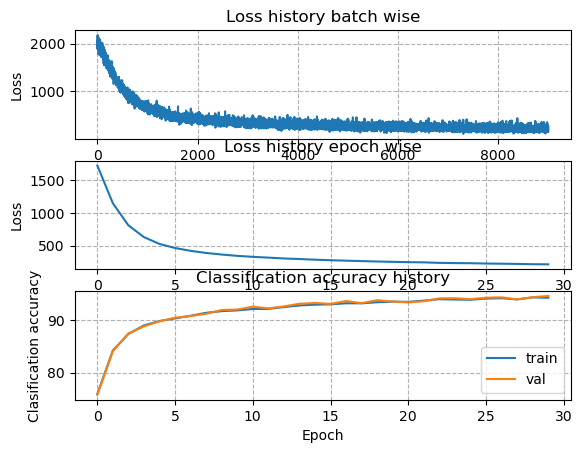

In [12]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [17]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256
for hidden_node in num_hidden_nodes:
    
        net = FirstNN(data_dimension, hidden_node, num_classes)
        for lr in learning_rates:
            
            stats = net.train(X_train, Y_train, X_val, Y_val,
                              num_iters=num_iters,
                              num_epoch=num_epoch,
                              batch_size=batch_size,
                              learning_rate=lr,
                              verbose=False
                             )
            
            val_acc = stats['val_acc_history'][-1]
            results[(lr, hidden_node)] = val_acc
            
            if val_acc > best_val:
                best_val = val_acc
                best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

Best validation accuracy achieved during cross-validation: 97.13 for #hdnn: 100, lr: 0.01


# Test on best model

In [19]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.92
Validation accuracy: 97.20
Test accuracy: 94.52
